[[0.32941176 0.33333333 0.3372549  ... 0.31764706 0.32156863 0.3254902 ]
 [0.33333333 0.3372549  0.34117647 ... 0.32156863 0.3254902  0.32941176]
 [0.3372549  0.34117647 0.34509804 ... 0.3254902  0.32941176 0.33333333]
 ...
 [0.38039216 0.38431373 0.38823529 ... 0.36862745 0.37254902 0.37647059]
 [0.38431373 0.38823529 0.39215686 ... 0.37254902 0.37647059 0.38039216]
 [0.38823529 0.39215686 0.39607843 ... 0.37647059 0.38039216 0.38431373]]


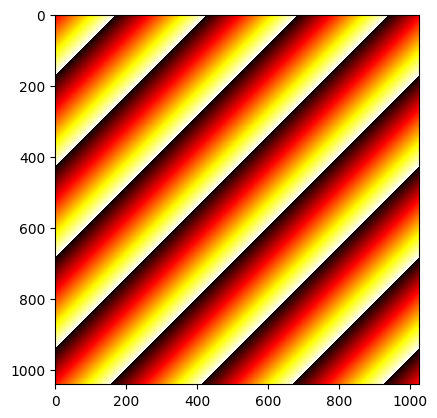

(1040, 1024)


In [25]:
import numpy as np
from PIL import ImageGrab, Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/Users/christianjohnson/Downloads/Image__2024-01-18__20-04-29.bmp'

path2 = '/Users/christianjohnson/Downloads/Unknown.png'
img2 = np.array(Image.open(path2))

img = np.array(Image.open(path))
img= img/255.
print(img)
plt.imshow(img, cmap='hot', interpolation='nearest')
plt.show()

print(img.shape)

#r, c = img.shape


[[0.83902966 0.31749219 0.33736616 ... 0.04405173 0.77166801 0.08298271]
 [0.63891843 0.50027358 0.35894738 ... 0.03532059 0.05369467 0.94877796]
 [0.52391432 0.76803904 0.17996887 ... 0.14366251 0.09465087 0.90650555]
 ...
 [0.65766448 0.77272835 0.1502422  ... 0.44621415 0.0577226  0.28579015]
 [0.05462838 0.48905139 0.13218362 ... 0.56222754 0.27361142 0.80555922]
 [0.30787515 0.89901161 0.47261454 ... 0.06542361 0.95105951 0.55338587]]


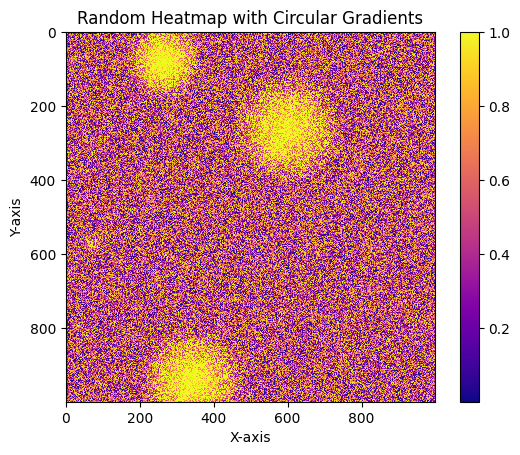

In [26]:
# Size of the heatmap
heatmap_size = 1000

# Number of random center points
num_centers = 5

# Generate a random 2D array
heatmap = np.random.rand(heatmap_size, heatmap_size)

print(heatmap)

# Generate random center points
center_points = np.random.randint(0, heatmap_size, size=(num_centers, 2))

# Apply circular gradients around center points
for center in center_points:
    center_intensity = np.random.rand()
    radius_factor = np.random.uniform(1, 2)
    region_radius = int(radius_factor * heatmap_size / 10)

    for i in range(heatmap_size):
        for j in range(heatmap_size):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            gradient_value = center_intensity - distance / region_radius
            heatmap[i, j] += max(0, gradient_value)  # Ensure values are not below zero

# Normalize values to be in the range [0, 1]
heatmap = np.clip(heatmap, 0, 1)

# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(heatmap, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.title('Random Heatmap with Circular Gradients')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# this is the random heatmap that has some random hotspots

In [28]:
# takes in a numpy array (1000x1000) and block size
def blockedVals(array, jump_Size):
    r = len(array)
    c = len(array[0])
    maxVal=0
    array1 = np.arange(0,r,jump_Size)[:200]
    array2 = np.arange(0,c,jump_Size)[:200]
    coord=(0,0)
    for i in array1:
        for j in array2:
            blockSum = 0
            for i2 in range(jump_Size):
                for j2 in range(jump_Size):
                    blockSum += img[i+i2][j+j2]
            if(blockSum/(jump_Size*jump_Size)>maxVal):
                maxVal=(blockSum/(jump_Size*jump_Size))
                coord=(i,j)
            #print(blockSum/(jump_Size*jump_Size))
    print(maxVal)
    print(coord)
    return(coord)

#coord=blockedVals(heatmap,5)
coord = blockedVals(img2,5)

for i in range(50):
    for j in range(50):
        #img[(coord[0]+i),(coord[1]+j)]=(img[(coord[0]+i),(coord[1]+j)])%50
        img2[(coord[0]+i),(coord[1]+j)]=0
img=img*255
im = Image.fromarray(img)
imgplot = plt.imshow(im)
#im.save("final product")


251.0
(170, 505)


IndexError: index 511 is out of bounds for axis 1 with size 511